In [1]:
from pyspark.sql import SparkSession

In [2]:
if __name__ =="__main__":

    spark = SparkSession \
    .builder \
    .appName("maarketdata") \
    .master("local[1]") \
    .getOrCreate()
    
    schema = "age INT, job STRING , marital STRING , education STRING, default STRING, balance INT,\
     housing STRING, loan STRING, contact STRING, day INT, month STRING, \
    duration INT, campaign INT, pdays INT, previous INT, poutcome STRING, y STRING "

    data = spark.read.csv("D:/Projectssssss/Capstone Project/marketanalysisdata.csv",
                          schema=schema,sep=",",header=True)
#data.createOrReplaceTempView("sample")
df2=spark.sql("select * from sample where age > 40 order by age ")
df2.printSchema()
df2.show()  
selected_data = data.select("age","job","marital","education")

    data.printSchema()
    data.show()
    

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- y: string (nullable = true)

+---+------------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
|age|         job| marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+---+------------+--------+---------+-------+-------+-------+----+-------+---+---

In [3]:
data.createOrReplaceTempView("sample")
df2=spark.sql("select * from sample where age > 40 order by age ")
df2.printSchema()
df2.show()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- y: string (nullable = true)

+---+------------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
|age|         job| marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+---+------------+--------+---------+-------+-------+-------+----+-------+---+---

In [4]:
# giving marketing success rate
# giving marketing failure rate

df3 = spark.sql("select y,count(*) as cnt from sample group by y")
df4 = spark.sql("select count(*) as total_cnt from sample")
df3.show()
df4.show()

df4.createOrReplaceTempView("total")
df3.createOrReplaceTempView("market")

+---+-----+
|  y|  cnt|
+---+-----+
| no|39922|
|yes| 5289|
+---+-----+

+---------+
|total_cnt|
+---------+
|    45211|
+---------+



In [5]:
# market success rate and failure 
df5=spark.sql("select m.y,m.cnt , t.total_cnt-m.cnt, m.cnt/t.total_cnt * 100 as percent from market m left join total t ")
df5.show()

+---+-----+-----------------+------------------+
|  y|  cnt|(total_cnt - cnt)|           percent|
+---+-----+-----------------+------------------+
| no|39922|             5289| 88.30151954170445|
|yes| 5289|            39922|11.698480458295547|
+---+-----+-----------------+------------------+



In [6]:
# average ,mean,median,age of targeted customer
df6 = spark.sql("select max(age) as Max_age, min(age) as Min_age, Avg(age) as mean_age from sample where y='yes'")
df6.show()

+-------+-------+------------------+
|Max_age|Min_age|          mean_age|
+-------+-------+------------------+
|     95|     18|41.670069956513515|
+-------+-------+------------------+



In [7]:
df7 = spark.sql("select avg(balance) as mean_balance,percentile_approx(balance,0.5) as median_balance from sample ").show()

+------------------+--------------+
|      mean_balance|median_balance|
+------------------+--------------+
|1362.2720576850766|           448|
+------------------+--------------+



In [8]:
# age matters marketing subscription
df8 = spark.sql("select age,count(*) as cnt from sample where y ='yes' group by age order by cnt").show()

+---+---+
|age|cnt|
+---+---+
| 95|  1|
| 93|  2|
| 92|  2|
| 90|  2|
| 87|  3|
| 85|  4|
| 86|  4|
| 84|  5|
| 81|  6|
| 83|  6|
| 18|  7|
| 82|  8|
| 79| 10|
| 19| 11|
| 80| 12|
| 74| 13|
| 78| 14|
| 20| 15|
| 75| 15|
| 76| 16|
+---+---+
only showing top 20 rows



In [9]:
# marital status matters subscription of deposit
df9 = spark.sql("select marital,count(*)as cnt from sample where y = 'yes' group by marital order by cnt").show()

+--------+----+
| marital| cnt|
+--------+----+
|divorced| 622|
|  single|1912|
| married|2755|
+--------+----+



In [10]:
# age and marital both matters subscription of deposit
df10 = spark.sql("select age, marital,count(*) as cnt,sum(case when y = 'yes' then 1 else 0 end) as deposit from sample group by age, marital order by age, marital").show()

+---+--------+---+-------+
|age| marital|cnt|deposit|
+---+--------+---+-------+
| 18|  single| 12|      7|
| 19|  single| 35|     11|
| 20| married|  3|      1|
| 20|  single| 47|     14|
| 21| married|  5|      1|
| 21|  single| 74|     21|
| 22| married|  9|      0|
| 22|  single|120|     40|
| 23| married| 27|      2|
| 23|  single|175|     42|
| 24|divorced|  1|      0|
| 24| married| 53|     10|
| 24|  single|248|     58|
| 25|divorced|  6|      0|
| 25| married| 98|     14|
| 25|  single|423|     99|
| 26|divorced| 20|      0|
| 26| married|170|     13|
| 26|  single|615|    121|
| 27|divorced| 18|      2|
+---+--------+---+-------+
only showing top 20 rows



In [14]:
# age_featuring
df11 = spark.sql("select * ,case when age<=20 then '20-' \
                  when age >20 and age<=30 then '20-30' \
                  when age >30 and age<=40 then '30-40' \
                  when age >40 and age<=50 then '40-50' \
                  when age >50 and age<=60 then '50-60' \
                  when age >60 and age<=70 then '60-70' \
                     else '70+' end as age_featuring from sample")
df11.show()


+---+------------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+-------------+
|age|         job| marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|  y|age_featuring|
+---+------------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+-------------+
| 58|  management| married| tertiary|     no|   2143|    yes|  no|unknown|  5|  may|     261|       1|   -1|       0| unknown| no|        50-60|
| 44|  technician|  single|secondary|     no|     29|    yes|  no|unknown|  5|  may|     151|       1|   -1|       0| unknown| no|        40-50|
| 33|entrepreneur| married|secondary|     no|      2|    yes| yes|unknown|  5|  may|      76|       1|   -1|       0| unknown| no|        30-40|
| 47| blue-collar| married|  unknown|     no|   1506|    yes|  no|unknown|  5|  may|      92|       1|   -1|       0| unknown| no|

In [31]:
df11.createOrReplaceTempView("aged")
df12 = spark.sql("select sum(campaign) as campaign,age_featuring from aged group by age_featuring order by campaign").show()

+--------+-------------+
|campaign|age_featuring|
+--------+-------------+
|     229|          20-|
|    1040|          70+|
|    1368|        60-70|
|   17740|        20-30|
|   22725|        50-60|
|   32594|        40-50|
|   49260|        30-40|
+--------+-------------+



In [41]:
import matplotlib as ply
import pandas as pd
import seaborn as sns

In [35]:
df13=spark.sql("select age,y from aged")
df13.show()

+---+---+
|age|  y|
+---+---+
| 58| no|
| 44| no|
| 33| no|
| 47| no|
| 33| no|
| 35| no|
| 28| no|
| 42| no|
| 58| no|
| 43| no|
| 41| no|
| 29| no|
| 53| no|
| 58| no|
| 57| no|
| 51| no|
| 45| no|
| 57| no|
| 60| no|
| 33| no|
+---+---+
only showing top 20 rows



<Axes: xlabel='y', ylabel='count'>

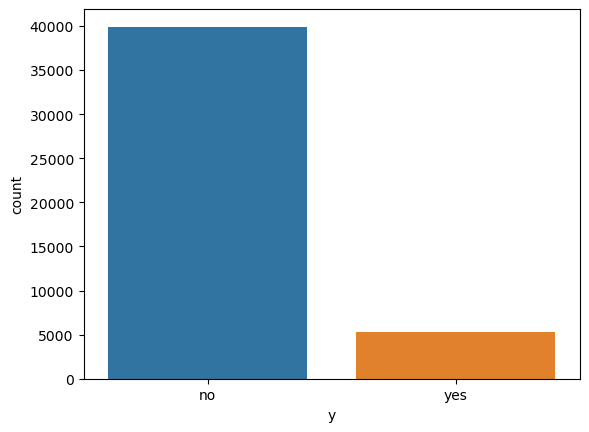

In [44]:
df14=df13.toPandas()
sns.countplot(data=df14, x='y')